In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.extras import stack
from pywin.framework.editor.configui import paletteVGA

In [73]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)

In [46]:
# 결측치 확인
df = pd.read_csv('data/netflix_users.csv')
df.head(10)

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
5,6,David Johnson,21,USA,Standard,615.93,Romance,2025-02-03
6,7,John Hernandez,57,Canada,Standard,755.47,Romance,2025-01-05
7,8,Katie Hernandez,68,USA,Standard,145.23,Sci-Fi,2024-10-30
8,9,James Williams,39,UK,Basic,950.14,Action,2024-04-16
9,10,Alex Davis,55,Mexico,Standard,696.66,Horror,2024-07-03


In [47]:
# 중복값 확인
df.describe(include='object')
display(df.describe(include='all'))
df.duplicated().sum() # 0
df.shape # (25000, 8)

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
count,25000.000000,25000,25000.000000,25000,25000,25000.000000,25000,25000
unique,NaN,100,NaN,10,3,NaN,7,366
top,NaN,Michael Hernandez,NaN,UK,Premium,NaN,Horror,2024-09-05
freq,NaN,292,NaN,2592,8402,NaN,3654,92
mean,12500.500000,NaN,46.482880,NaN,NaN,500.468858,NaN,NaN
std,7217.022701,NaN,19.594861,NaN,NaN,286.381815,NaN,NaN
min,1.000000,NaN,13.000000,NaN,NaN,0.120000,NaN,NaN
25%,6250.750000,NaN,29.000000,NaN,NaN,256.567500,NaN,NaN
50%,12500.500000,NaN,46.000000,NaN,NaN,501.505000,NaN,NaN
75%,18750.250000,NaN,63.000000,NaN,NaN,745.732500,NaN,NaN


(25000, 8)

#### Columns
- User_ID – Unique identifier for each user
- Name – Randomly generated name
- Age – Age of the user (13 to 80)
- Country – User’s country (randomly chosen from 10 options)
- Subscription_Type – Type of Netflix plan (Basic, Standard, Premium)
- Watch_Time_Hours – Total hours watched in the last month
- Favorite_Genre – User’s preferred genre
- Last_Login – Last recorded login date within the past year

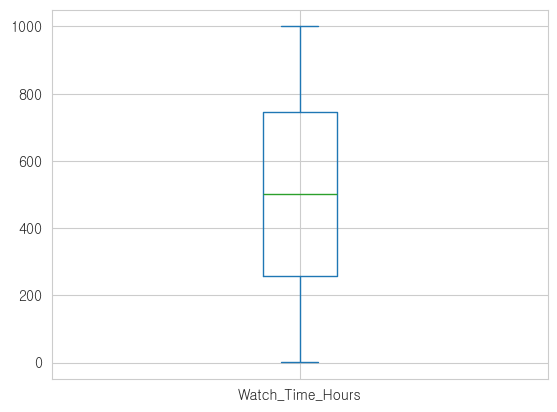

In [48]:
# 데이터 이상치
df['Watch_Time_Hours'].plot(kind='box')
plt.show()

In [49]:
# 연령대 확인
min(df['Age']) #13
max(df['Age']) #80

80

In [50]:
# 데이터 전처리(범주형 -> 수치화) 인코더
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df.loc[:, 'Favorite_Genre'] = encoder.fit_transform(df['Favorite_Genre'])
# print(encoder.classes_)

# 나이그룹 범주형
df['Age_cat'] = pd.cut(df['Age'], bins=[10, 20, 30, 60, df['Age'].max()],
                       labels=['Teenager', 'Young Adult', 'Adult', 'Senior'])
df.head()

# User_ID -> 인덱스 처리
# df.set_index('User_ID', inplace=True)
df.info, df.head(3)

(<bound method DataFrame.info of        User_ID              Name  Age    Country Subscription_Type  \
 0            1    James Martinez   18     France           Premium   
 1            2       John Miller   23        USA           Premium   
 2            3        Emma Davis   60         UK             Basic   
 3            4       Emma Miller   44        USA           Premium   
 4            5        Jane Smith   68        USA          Standard   
 ...        ...               ...  ...        ...               ...   
 24995    24996      David Miller   18  Australia           Premium   
 24996    24997       Jane Miller   17        USA           Premium   
 24997    24998      Sarah Miller   14        USA           Premium   
 24998    24999  Michael Williams   71        USA             Basic   
 24999    25000       James Jones   19    Germany           Premium   
 
        Watch_Time_Hours Favorite_Genre  Last_Login      Age_cat  
 0                 80.26          Drama  2024-0

### Feature Engineering

In [51]:
# 날짜형 변환 및 Last_Login 요일 컬럼 생성
df["Last_Login"] = pd.to_datetime(df['Last_Login'])
df['Day_Name'] = df['Last_Login'].dt.day_name()

display(df[['Last_Login', 'Day_Name']].head())
df.columns
df.head(3)

,Last_Login,Day_Name
0,2024-05-12,Sunday
1,2025-02-05,Wednesday
2,2025-01-24,Friday
3,2024-03-25,Monday
4,2025-01-14,Tuesday


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_cat,Day_Name
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,Teenager,Sunday
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,Young Adult,Wednesday
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,Adult,Friday


In [52]:
# 범주형 -> 숫자형(수치화)


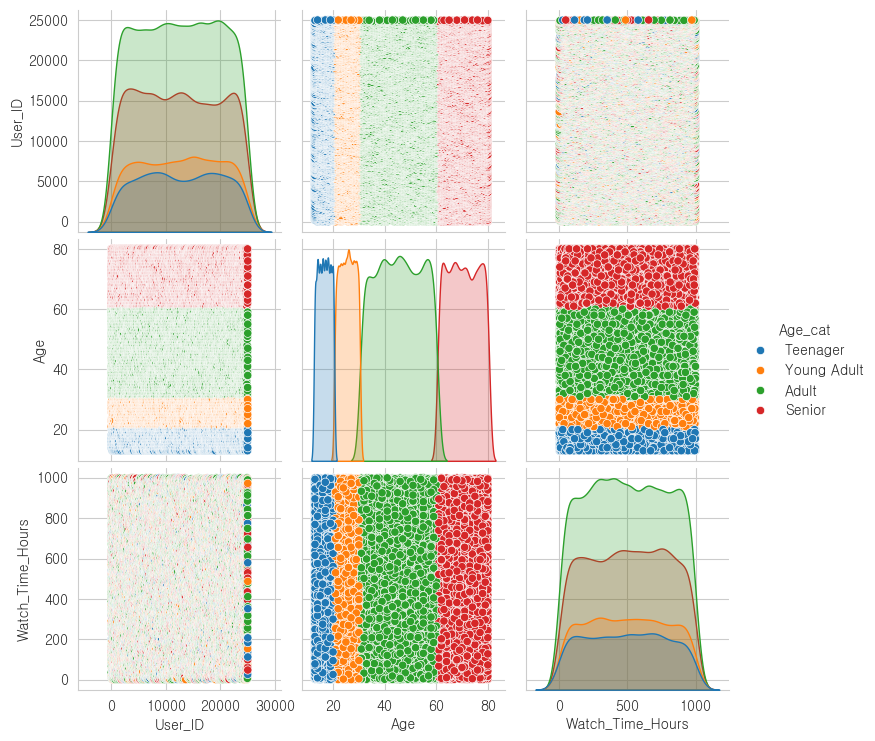

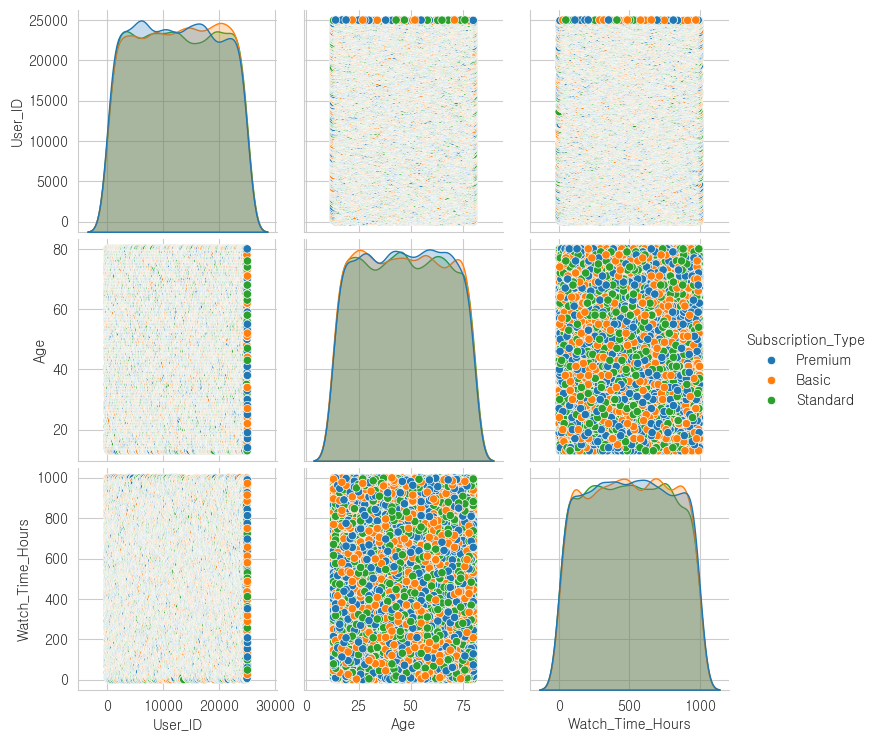

In [53]:
sns.pairplot(df, hue='Age_cat')
plt.show()

sns.pairplot(df, hue='Subscription_Type')
# print(encoder.classes_)
# plt.show()

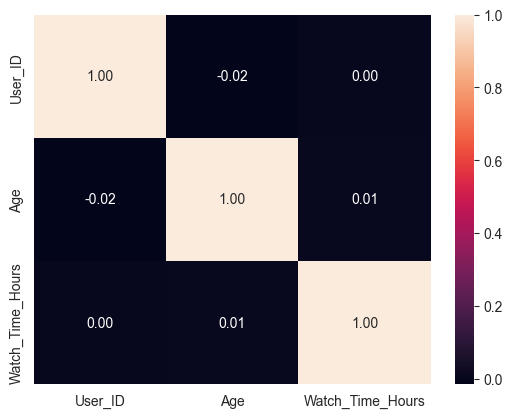

In [54]:
# - 수치형 데이터만 상관계수 게산이 가능하다
corr_mat = df.corr(numeric_only=True) # 수치형 데이터만 수집
corr_mat

# 히트맵 시각화 heatmap() -> 범주형 -> 인코딩 후
sns.heatmap(corr_mat, annot=True, fmt='.2f') # 숫자 보여주고, 형식은 이렇게라는 뜻
plt.show()

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46021 (

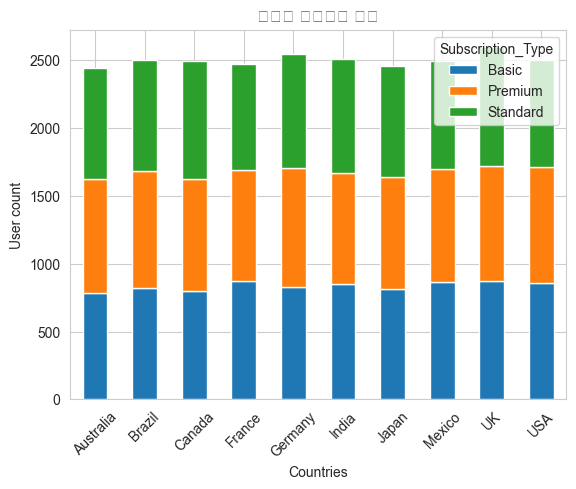

In [55]:
# 1. 국가별 구독유형 분포
# 결측치가 없으므로 Name 컬럼 기준으로 count
# unstack할 경우 pivot 테이블처럼 만든다
country_sub = df.groupby(['Country', 'Subscription_Type'])['Name'].count().unstack(fill_value=0)

# 시각화
country_sub.plot(kind='bar', stacked=True)
plt.title('국가별 구독유형 분포')
plt.xlabel('Countries')
plt.ylabel('User count')
plt.xticks(rotation=45)
plt.show()


,mean,sum,max
Subscription_Type,,,
Basic,46.349689,387298,80
Premium,46.557962,391180,80
Standard,46.541373,383594,80


Subscription_Type
Basic       Senior
Premium     Senior
Standard    Senior
Name: Age_cat, dtype: category
Categories (4, object): ['Teenager' < 'Young Adult' < 'Adult' < 'Senior']


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3447819837.py:11: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3447819837.py:11: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3447819837.py:11: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3447819837.py:11: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3447819837.py:11: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3447819837.py:11: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from fo

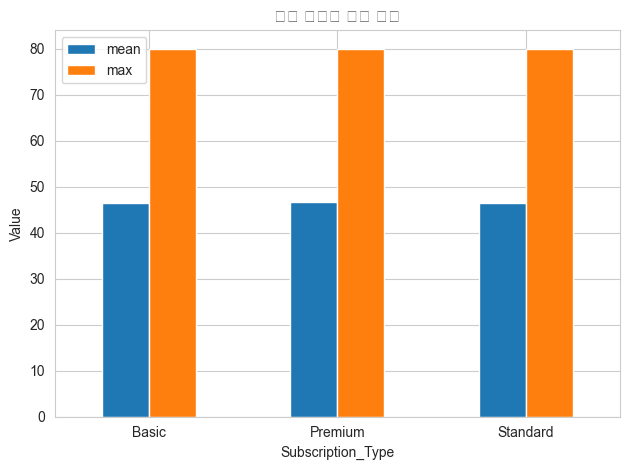

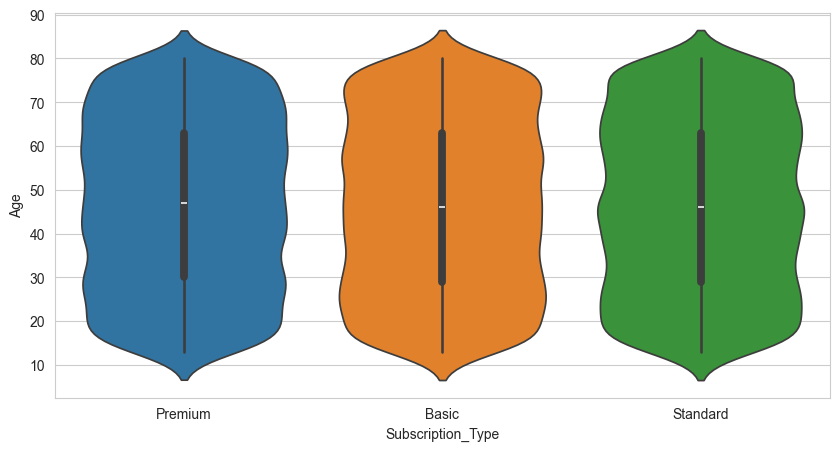

In [56]:
# 2. 나이별 구독 유형 분포
# df['Subscription_Type'].value_counts().plot(kind='line', stacked=True)
# plt.show()
display(df.groupby('Subscription_Type')['Age'].agg(['mean', 'sum', 'max']))
print(df.groupby('Subscription_Type')['Age_cat'].max()) # 문자형->수치화

df.groupby('Subscription_Type')['Age'].agg(['mean', 'max']).plot(kind='bar')
plt.title('구독 유형별 나이 분포')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Subscription_Type', y='Age', hue='Subscription_Type', inner='box')
plt.show()


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3869237950.py:8: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3869237950.py:8: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3869237950.py:8: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3869237950.py:8: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3869237950.py:8: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3869237950.py:8: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Ar

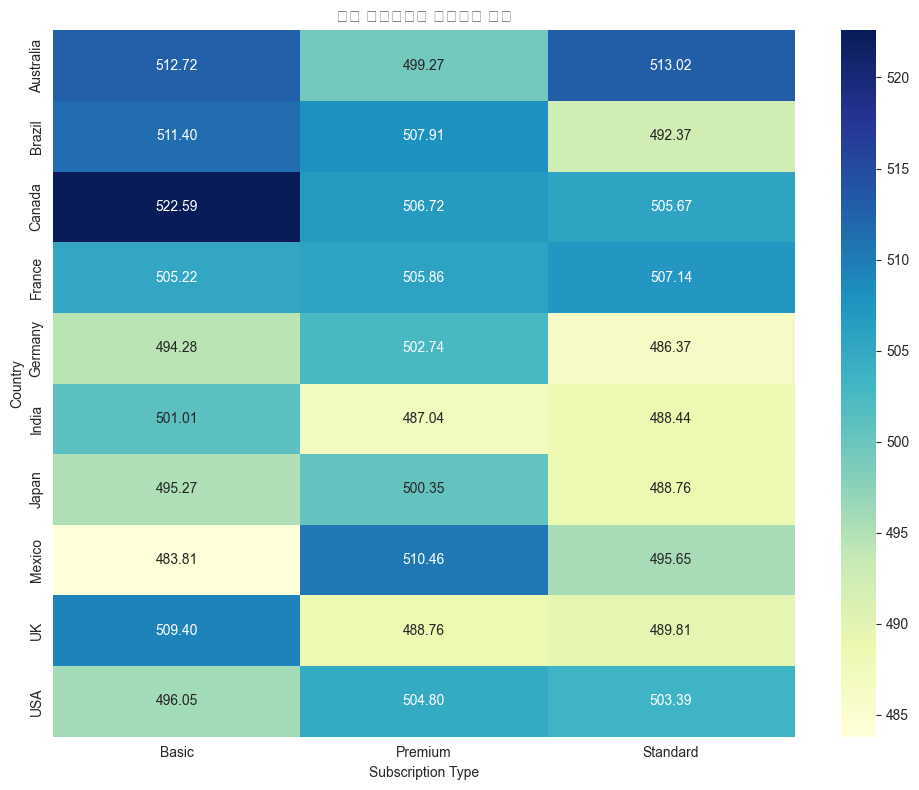

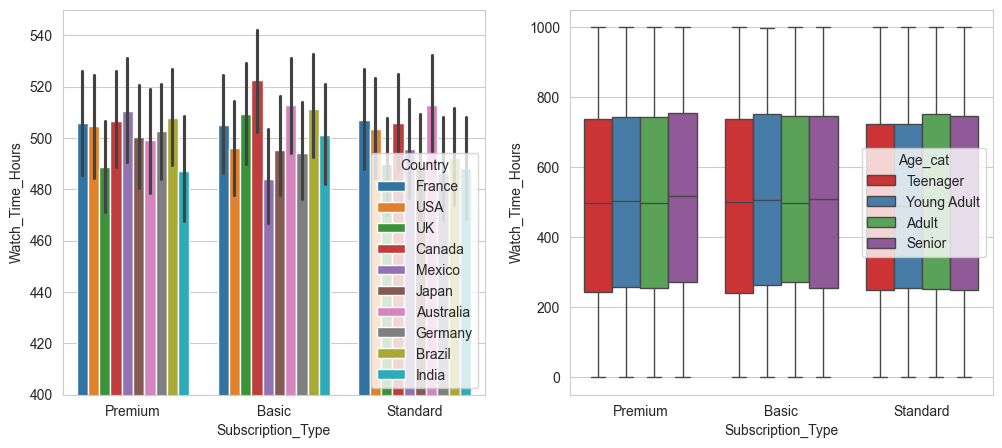

In [57]:
# 3. 구독 유형 vs 시청시간
avg_watch = df.groupby(['Country', 'Subscription_Type'])['Watch_Time_Hours'].mean().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(avg_watch, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('국가 구독유형별 시청시간 평균')
plt.xlabel('Subscription Type')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=df, x='Subscription_Type', y='Watch_Time_Hours', hue='Country', ax=ax[0])
ax[0].set_ylim(400, 550)
# sns.boxplot(data=df, x='Subscription_Type', y='Watch_Time_Hours', ax=ax[1], palette='Set1')
sns.boxplot(data=df, x='Subscription_Type', y='Watch_Time_Hours', ax=ax[1], hue='Age_cat', palette='Set1') # +나이
plt.show()

C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\4250512177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  genre = sns.catplot(


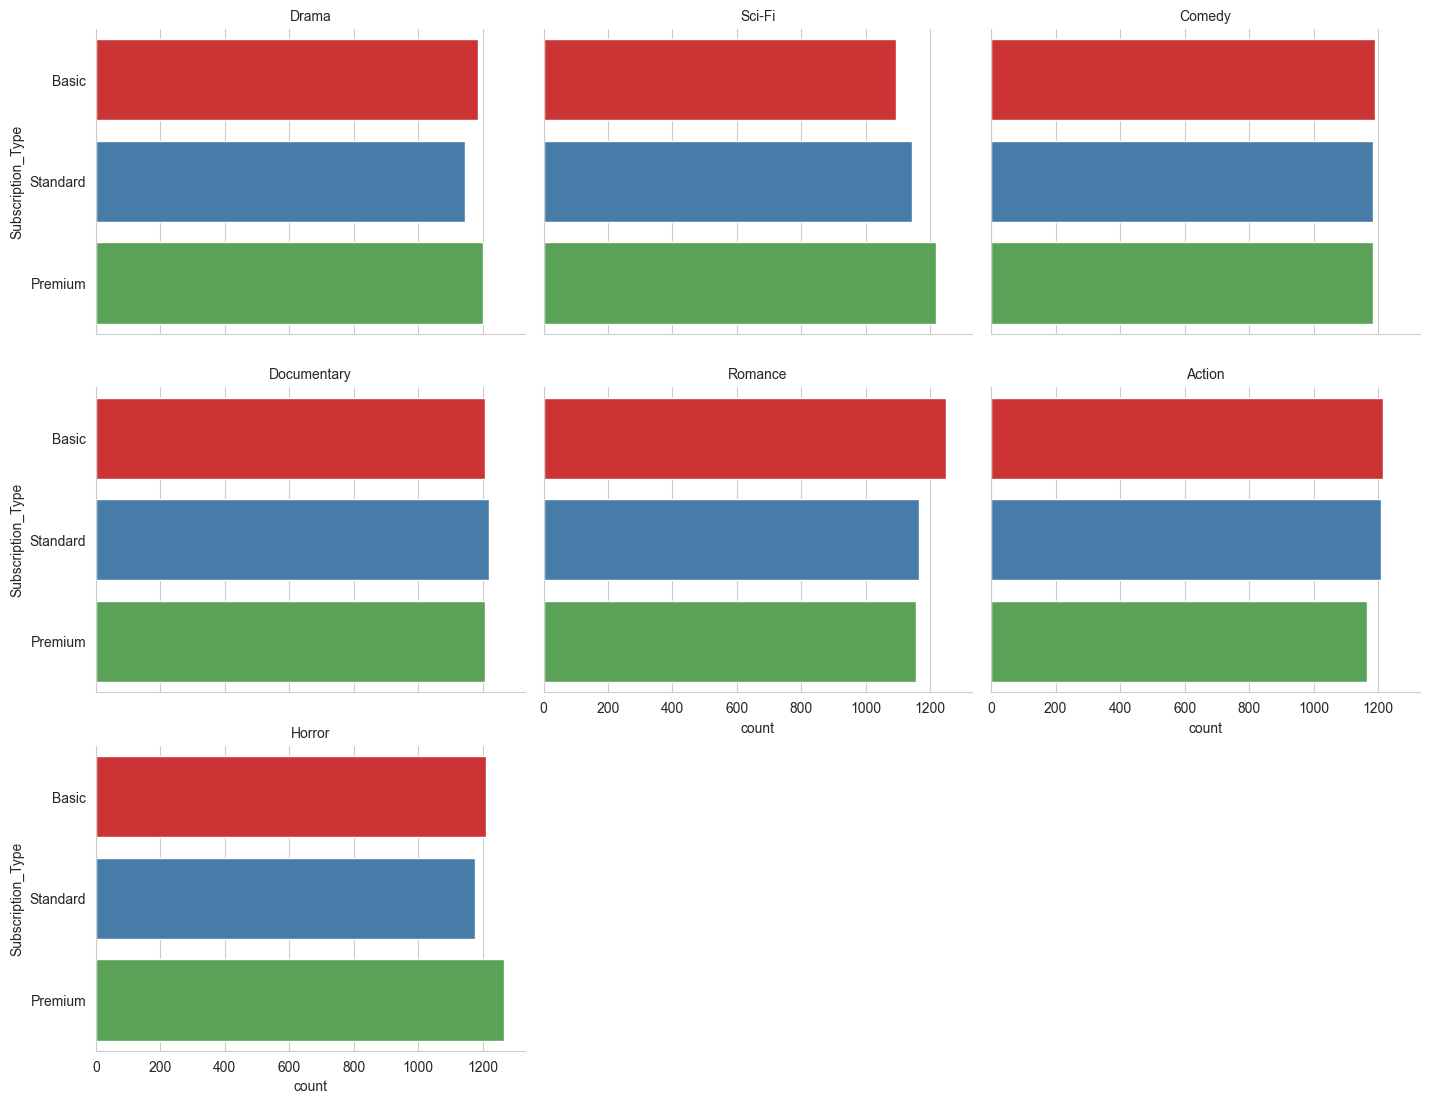

In [58]:
# 4. 구독유형 vs 장르 선호
# sns.catplot(data=df, x='Favorite_Genre', kind='count', hue='Subscription_Type')

genre = sns.catplot(
    data=df,
    kind='count',
    y='Subscription_Type',
    col='Favorite_Genre',
    col_wrap=3,
    height=4,
    aspect=1.2,
    order=['Basic', 'Standard', 'Premium'],
    palette='Set1' # 구독유형 순서 고정
)
genre.set_titles("{col_name}")
genre.fig.subplots_adjust(top=0.9)
plt.show()

Day_Name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Subscription_Type,,,,,,,
Basic,1210,1160,1198,1173,1206,1220,1189
Premium,1255,1239,1238,1208,1122,1175,1165
Standard,1182,1127,1180,1209,1211,1178,1155


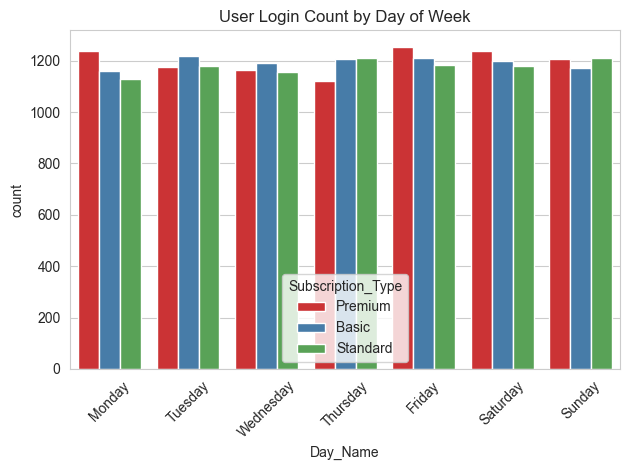

In [59]:
# 5. 구독유형 vs 요일별 시청 패턴
display(df.groupby(['Subscription_Type', 'Day_Name'])['Day_Name'].count().unstack())

# 5-1. 구독유형에 따른 요일별 사용자 수
# 요일 순서 지정 (월~일)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df, x='Day_Name', hue='Subscription_Type', order=days_order, palette='Set1')
plt.title('User Login Count by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3797752340.py:16: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3797752340.py:16: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3797752340.py:16: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3797752340.py:16: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3797752340.py:16: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\3797752340.py:16: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from fo

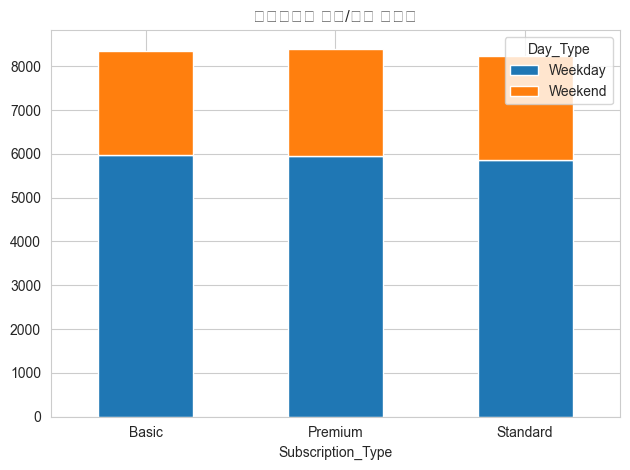

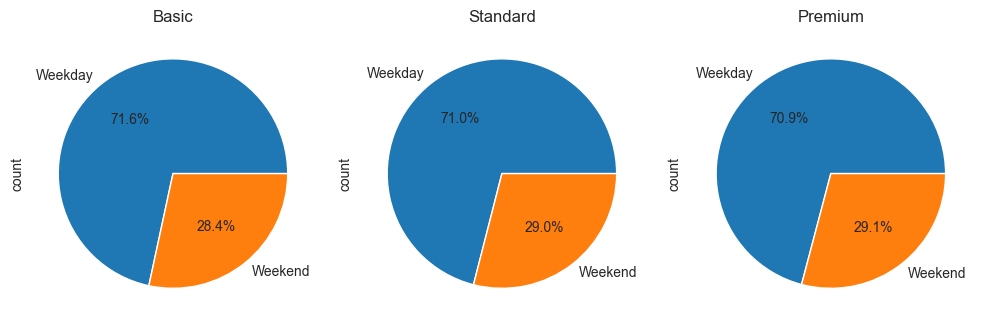

In [60]:
# 5-2. 구독유형별 주중/주말 사용자
# 주중/주말 분리
def classify_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df['Day_Type'] = df['Day_Name'].apply(classify_day)
df.groupby(['Subscription_Type', 'Day_Type'])['Subscription_Type'].count()

# 막대 그래프
df.groupby(['Subscription_Type', 'Day_Type']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)
plt.title('구독유형별 주중/주말 사용자')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 파이 그래프
premium = df[df['Subscription_Type'] == 'Premium']
standard = df[df['Subscription_Type'] == 'Standard']
basic = df[df['Subscription_Type'] == 'Basic']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
basic['Day_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0], title='Basic')
standard['Day_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1], title='Standard')
premium['Day_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[2], title='Premium')
plt.tight_layout()
plt.show()

11291   2024-03-08
16184   2024-03-08
17986   2024-03-08
3481    2024-03-08
770     2024-03-08
           ...    
3648    2025-03-08
17503   2025-03-08
23913   2025-03-08
9941    2025-03-08
14423   2025-03-08
Name: Last_Login, Length: 8402, dtype: datetime64[ns]


C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:14: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:14: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:14: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:14: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:14: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:14: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(

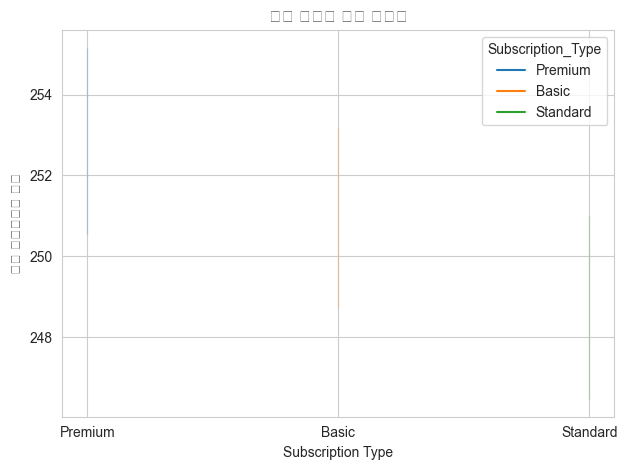

C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:21: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:21: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:21: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:21: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:21: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata2\AppData\Local\Temp\ipykernel_17252\2060129096.py:21: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(

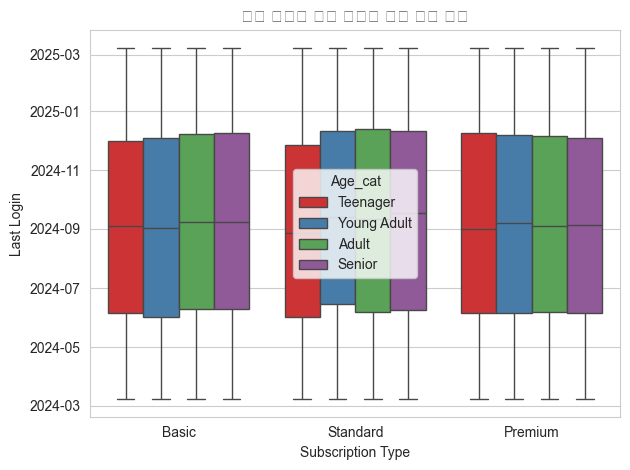

In [61]:
# 6. 구독유형 vs 최근 활동성
# df[df['Last_Login'] == df['Last_Login'].max()].sort_values('Last_Login', ascending=False)
print(premium['Last_Login'].sort_values())  # 의미없음 1년 within
standard['Last_Login']
basic['Last_Login']

type_order = ['Basic', 'Standard', 'Premium']

df['Recent_Login'] = (pd.Timestamp('today') - df['Last_Login']).dt.days
sns.lineplot(data=df, x='Subscription_Type', y='Recent_Login',hue='Subscription_Type')
plt.title('구독 유형별 최근 활동성')
plt.ylabel('최근 날짜로부터 차이')
plt.xlabel('Subscription Type')
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x='Subscription_Type', y='Last_Login',order=type_order, hue='Age_cat', palette='Set1')
plt.title('구독 유형에 따른 세대별 최근 사용 날짜')
plt.ylabel('Last Login')
plt.xlabel('Subscription Type')
plt.tight_layout()
plt.show()

In [62]:
# 7. 구독 유형 도입 전후 연령대 분포 변화 (베이직 폐지 광고형 스탠다드 도입)


Subscription_Type
Premium     35.145942
Basic       32.786885
Standard    32.067173
Name: proportion, dtype: float64


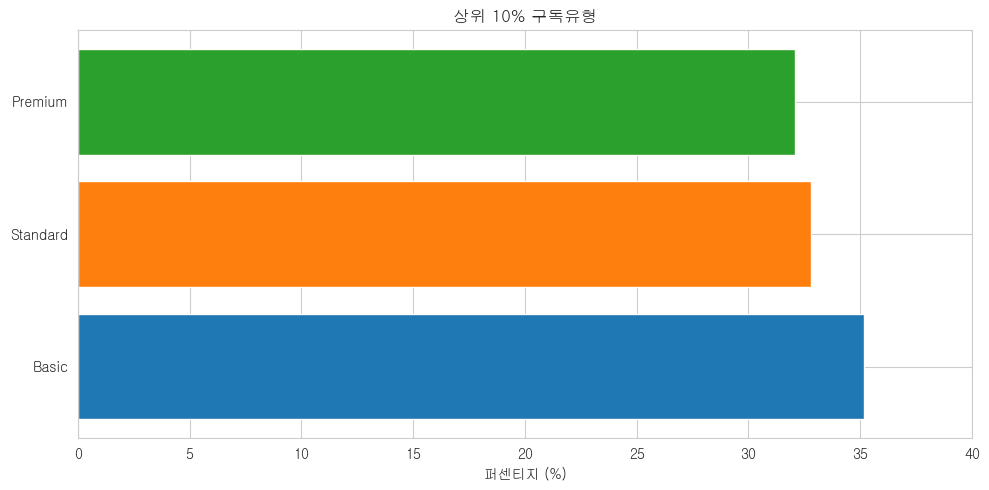

In [74]:
# 8. 시청 시간 상위 사용자 중 구독 유형 비율
a = df[df['Watch_Time_Hours'] >= df['Watch_Time_Hours'].quantile(0.90)]
# 구독 유형별 사용자 비율 계산
top_10 = a['Subscription_Type'].value_counts(normalize=True) * 100
print(top_10)
# premium > basic >= standard
labels = ['Basic', 'Standard', 'Premium']
values = [35.15, 32.79, 32.07]

plt.figure(figsize=(10, 5))
plt.barh(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('퍼센티지 (%)')
plt.title('상위 10% 구독유형')
plt.xlim(0, 40)  # 최대 40%로 고정
plt.tight_layout()
plt.show()

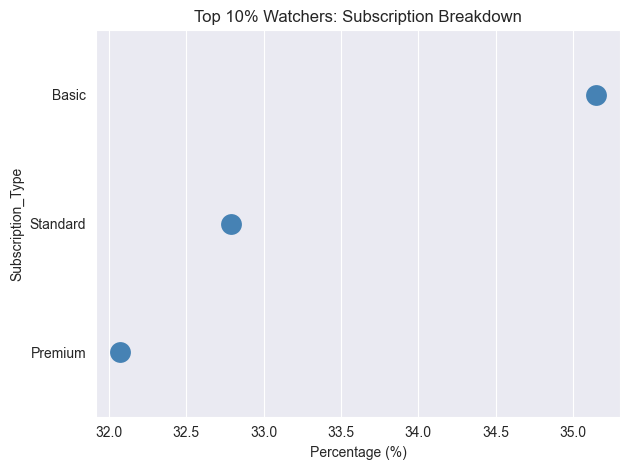

In [34]:
labels = ['Basic', 'Standard', 'Premium']
values = [35.15, 32.79, 32.07]

# DataFrame 생성
data = pd.DataFrame({
    'Subscription_Type': labels,
    'Percent': values
})

# stripplot 그리기
sns.stripplot(data=data, x='Percent', y='Subscription_Type', size=15, color='steelblue')
plt.title('Top 10% Watchers: Subscription Breakdown')
plt.xlabel('Percentage (%)')
plt.tight_layout()
plt.show()


In [40]:

df[['User_ID']].set_index('User_ID', inplace=True)
df.head(10)

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Age_cat,Day_Name,Day_Type,Recent_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,Teenager,Sunday,Weekend,369
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,Young Adult,Wednesday,Weekday,100
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,Adult,Friday,Weekday,112
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,Adult,Monday,Weekday,417
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,Senior,Tuesday,Weekday,122
5,6,David Johnson,21,USA,Standard,615.93,Romance,2025-02-03,Young Adult,Monday,Weekday,102
6,7,John Hernandez,57,Canada,Standard,755.47,Romance,2025-01-05,Adult,Sunday,Weekend,131
7,8,Katie Hernandez,68,USA,Standard,145.23,Sci-Fi,2024-10-30,Senior,Wednesday,Weekday,198
8,9,James Williams,39,UK,Basic,950.14,Action,2024-04-16,Adult,Tuesday,Weekday,395
9,10,Alex Davis,55,Mexico,Standard,696.66,Horror,2024-07-03,Adult,Wednesday,Weekday,317
